# Flipr Hackathon 6.0 Machine learning

# Covid19 Cases Prediction

## Problem Statement 1: Prediction of Covid19 cases

## Data Analysis

## Importing Required Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats

In [46]:
get_ipython().run_line_magic('matplotlib', 'inline')

### importing the data

In [47]:
df = pd.read_excel('cleaned_final_train_data.xlsx',sheet_name = 0)

In [48]:
df.head()

,Unnamed: 0,City,State,Type,SWM,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases,SWM-HIGH,SWM-LOW,SWM-MEDIUM
0,0,Mumbai,Maharashtra,M.C,MEDIUM,1.000000,0.842610,0.71875,0.800,0.964758,1.000000,0.941130,163115,0,0,1
1,1,Delhi,Delhi,M.C,MEDIUM,0.884705,0.823417,0.84375,0.750,0.947137,0.930818,0.507859,80188,0,0,1
2,2,Bangalore,Karnataka,MPUA,HIGH,0.678060,0.898273,0.87500,0.925,0.933921,0.773585,0.135868,141000,1,0,0
3,3,Hyderabad,Telangana,MPUA,MEDIUM,0.547321,0.892514,0.71875,0.775,0.955947,0.691824,0.026913,55123,0,0,1
4,4,Ahmedabad,Gujarat,MPUA,LOW,0.447711,0.817658,0.90625,0.625,1.000000,0.459119,0.060830,33204,0,1,0


In [49]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [50]:
df

,City,State,Type,SWM,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases,SWM-HIGH,SWM-LOW,SWM-MEDIUM
0,Mumbai,Maharashtra,M.C,MEDIUM,1.000000,0.842610,0.71875,0.800,0.964758,1.000000,0.941130,163115,0,0,1
1,Delhi,Delhi,M.C,MEDIUM,0.884705,0.823417,0.84375,0.750,0.947137,0.930818,0.507859,80188,0,0,1
2,Bangalore,Karnataka,MPUA,HIGH,0.678060,0.898273,0.87500,0.925,0.933921,0.773585,0.135868,141000,1,0,0
3,Hyderabad,Telangana,MPUA,MEDIUM,0.547321,0.892514,0.71875,0.775,0.955947,0.691824,0.026913,55123,0,0,1
4,Ahmedabad,Gujarat,MPUA,LOW,0.447711,0.817658,0.90625,0.625,1.000000,0.459119,0.060830,33204,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Lunawada,Gujarat,M,MEDIUM,0.002970,0.811900,0.71875,0.700,0.299559,0.119497,0.060830,1944,0,0,1
779,Murshidabad,West Bengal,M,MEDIUM,0.002969,0.906910,0.71875,0.900,0.273128,0.138365,0.317949,2172,0,0,1
780,Mahe,Puducherry,M,HIGH,0.002960,0.977927,0.87500,0.700,0.431718,0.169811,0.022659,2851,1,0,0
781,Lanka,Assam,M.B,MEDIUM,0.002958,0.863724,0.75000,0.150,0.277533,0.094340,0.005277,2158,0,0,1


In [51]:
print(df.dtypes)

City                  object
State                 object
Type                  object
SWM                   object
Population [2011]    float64
Sex Ratio            float64
Median Age           float64
Avg Temp             float64
Toilets Avl          float64
# of hospitals       float64
Foreign Visitors     float64
Covid Cases            int64
SWM-HIGH               int64
SWM-LOW                int64
SWM-MEDIUM             int64
dtype: object


## Removing Outliers

In [52]:
from scipy import stats

df_1 = df.drop(['City','State','Type','SWM'],axis = 1,inplace = False)
z_scores = stats.zscore(df_1)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [53]:
len(df)

740

In [54]:
df.corr()

,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases,SWM-HIGH,SWM-LOW,SWM-MEDIUM
Population [2011],1.000000,-0.101831,-0.035619,0.012397,0.515385,0.520396,0.085073,0.640414,-0.011053,0.058885,-0.048245
Sex Ratio,-0.101831,1.000000,0.173611,-0.011344,-0.052553,-0.067052,-0.189054,0.010689,0.031946,-0.016504,-0.015889
Median Age,-0.035619,0.173611,1.000000,-0.028195,-0.025660,-0.057814,-0.006302,0.014255,0.040528,-0.043677,0.002825
Avg Temp,0.012397,-0.011344,-0.028195,1.000000,0.025157,0.056613,0.074768,0.033194,-0.014828,0.036236,-0.021505
Toilets Avl,0.515385,-0.052553,-0.025660,0.025157,1.000000,0.788069,0.025939,0.567436,-0.007070,0.005936,0.001209
# of hospitals,0.520396,-0.067052,-0.057814,0.056613,0.788069,1.000000,0.050521,0.596463,-0.016507,0.070375,-0.054298
Foreign Visitors,0.085073,-0.189054,-0.006302,0.074768,0.025939,0.050521,1.000000,0.142833,-0.020742,0.096698,-0.076584
Covid Cases,0.640414,0.010689,0.014255,0.033194,0.567436,0.596463,0.142833,1.000000,0.007113,0.017607,-0.025047
SWM-HIGH,-0.011053,0.031946,0.040528,-0.014828,-0.007070,-0.016507,-0.020742,0.007113,1.000000,-0.514781,-0.499215
SWM-LOW,0.058885,-0.016504,-0.043677,0.036236,0.005936,0.070375,0.096698,0.017607,-0.514781,1.000000,-0.485865


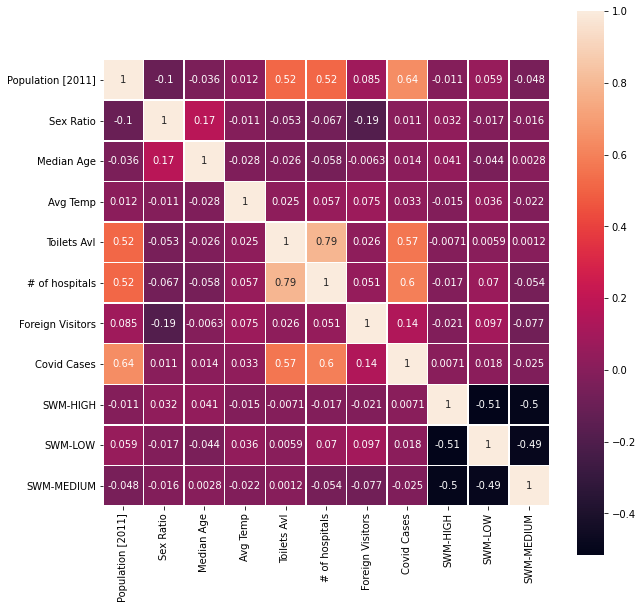

In [55]:
def correlation_heatmap(data):
    correlations = data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, #vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True)
    plt.show();
    
correlation_heatmap(df)

In [56]:
df.columns

Index(['City', 'State', 'Type', 'SWM', 'Population [2011]', 'Sex Ratio',
       'Median Age', 'Avg Temp', 'Toilets Avl', '# of hospitals',
       'Foreign Visitors', 'Covid Cases', 'SWM-HIGH', 'SWM-LOW', 'SWM-MEDIUM'],
      dtype='object')

In [57]:
columns1 = ['Population [2011]', 'Sex Ratio',
       'Median Age', 'Avg Temp', 'Toilets Avl', '# of hospitals',
       'Foreign Visitors', 'SWM-HIGH', 'SWM-LOW', 'SWM-MEDIUM']

for i in columns1:
    print(i)
    pearson_coef, p_value = stats.pearsonr(df[i], df['Covid Cases'])
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
    print((p_value < 0.05))
    print("------------------------------------------------------------------------------------------")

Population [2011]
The Pearson Correlation Coefficient is 0.6404140376448408  with a P-value of P = 1.1735565122991991e-86
True
------------------------------------------------------------------------------------------
Sex Ratio
The Pearson Correlation Coefficient is 0.010689196603196276  with a P-value of P = 0.7715910856975146
False
------------------------------------------------------------------------------------------
Median Age
The Pearson Correlation Coefficient is 0.014255487574272354  with a P-value of P = 0.6986412415630422
False
------------------------------------------------------------------------------------------
Avg Temp
The Pearson Correlation Coefficient is 0.033193866255069815  with a P-value of P = 0.36722008030585235
False
------------------------------------------------------------------------------------------
Toilets Avl
The Pearson Correlation Coefficient is 0.5674357554417077  with a P-value of P = 2.7562366224386565e-64
True
---------------------------------

<AxesSubplot:xlabel='Population [2011]', ylabel='Covid Cases'>

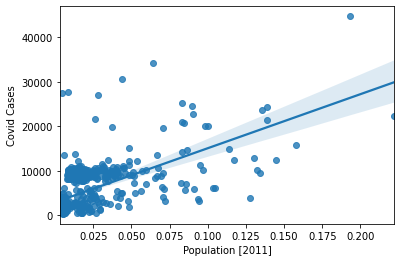

In [28]:
sns.regplot(x="Population [2011]", y="Covid Cases", data=df)

<AxesSubplot:xlabel='Sex Ratio', ylabel='Covid Cases'>

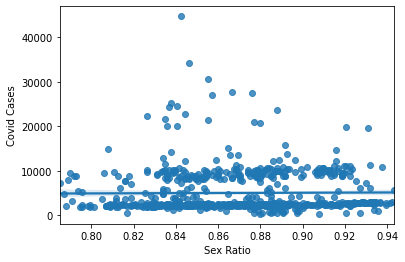

In [31]:
sns.regplot(x="Sex Ratio", y="Covid Cases", data=df)

<AxesSubplot:xlabel='Median Age', ylabel='Covid Cases'>

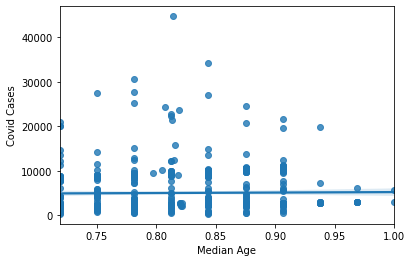

In [30]:
sns.regplot(x="Median Age", y="Covid Cases", data=df)

<AxesSubplot:xlabel='Avg Temp', ylabel='Covid Cases'>

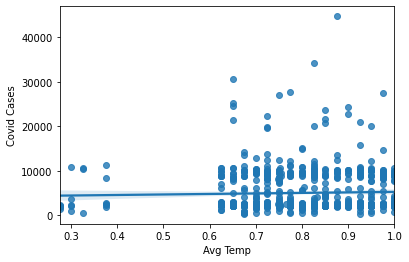

In [32]:
sns.regplot(x="Avg Temp", y="Covid Cases", data=df)

<AxesSubplot:xlabel='# of hospitals', ylabel='Covid Cases'>

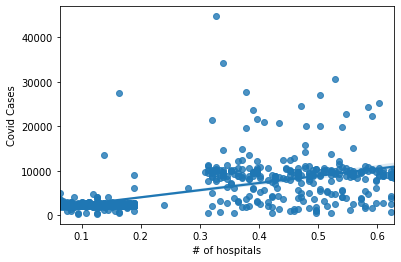

In [34]:
sns.regplot(x="# of hospitals", y="Covid Cases", data=df)

<AxesSubplot:xlabel='Foreign Visitors', ylabel='Covid Cases'>

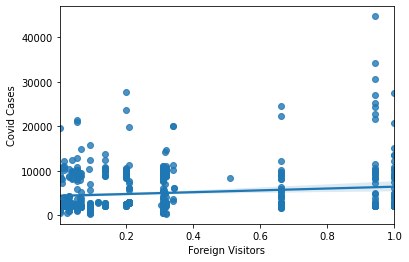

In [35]:
sns.regplot(x="Foreign Visitors", y="Covid Cases", data=df)

<AxesSubplot:xlabel='SWM', ylabel='Covid Cases'>

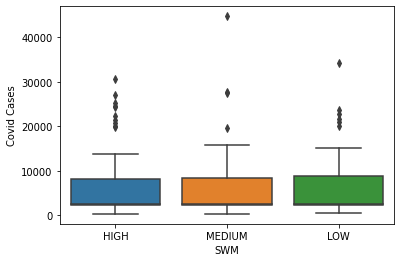

In [37]:
sns.boxplot(x="SWM", y="Covid Cases", data=df)

### ANOVA TEST ON INDUSTRY VARIABLE

In [38]:
df_gptest = df[['SWM','Covid Cases']]

grouped_test2=df_gptest[['SWM', 'Covid Cases']].groupby(['SWM'])
grouped_test2

In [39]:

# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('HIGH')['Covid Cases'], 
                              grouped_test2.get_group('MEDIUM')['Covid Cases'], 
                              grouped_test2.get_group('LOW')['Covid Cases'])

print( "ANOVA results: F=", f_val, ", P =", p_val)   


ANOVA results: F= 0.2456085742998429 , P = 0.7822923489911293


In [58]:
len(df)

740

In [61]:
dummy_variable_1 = pd.get_dummies(df["Type"])
dummy_variable_1.head(10)

,C-1T,C.B,C.M.C,C.T,C.T.,CMC,M,M Cl,M.B,M.C,...,Nagar Parishad,Np,T,T.C,T.M.C,T.M.C.,T.P,T.P.,U.A,UA
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
cleaned_final_data = pd.concat([df, dummy_variable_1], axis=1)

In [63]:
cleaned_final_data.drop(['Type'],axis  = 1, inplace = True)

In [64]:
dummy_variable_1 = pd.get_dummies(cleaned_final_data["State"])
dummy_variable_1.head(5)

,Andaman and Nicobar Islands,Andhra Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tamil nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
cleaned_final_data2 = pd.concat([cleaned_final_data, dummy_variable_1], axis=1)

In [66]:
cleaned_final_data2.drop(['State'],axis  = 1, inplace = True)

In [67]:
cleaned_final_data2.to_excel('final_training_data2.xlsx')

### The results shows that the linear regression model should not used to fit the data.... Rather that we should go for non- linear approach

### we can use neural network, random forest regressor or SVM regressor to train the model